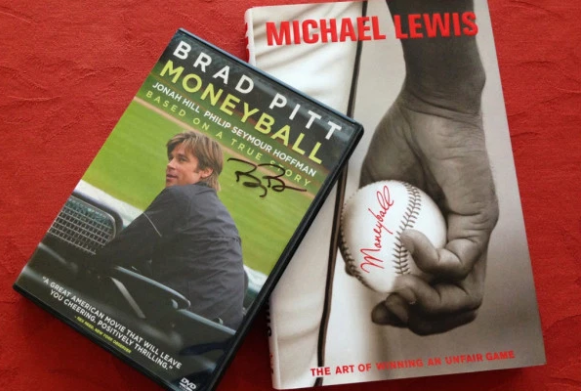

# The Story of On Base Percentage (OBP)



The publication of *Moneyball: The Art of Winning an Unfair Game* by Michael Lewis in 2003 is widely credited with the data analytics revolution in baseball and sports in general.  

There was data analysis in sports before Moneyball, but only after Moneyball were teams, and the public more broadly, convinced that data analysis could be used to improve sporting performance.  

The specific claim of Moneyball was quite subtle, and the arguments went like this:  
    
>Billy Beane, the General Manager of the cash-strapped Oakland A's recognized that teams reward batters for their hitting ability, measured by statistics such as **Slugging Percentage** (SLG), but did not reward them for the capacity to draw walks. But a walk is no different from a hit that gets you to first base. By hiring players who were good at drawing walks, The A's could run a better team than you would expect given their finances.
        
This amounts to saying that the market for players was inefficient, since the skills of certain players were being undervalued. It was as if some teams left hundred dollar bills lying on the sidewalk.  

Moneyball had  an immediate impact on baseball teams, who quickly hired statisticians to help them search for the missing value.

Two economists, Jahn Hakes and Skip Sauer, realized that this story was capable of being tested. If the Moneyball story is true, then is should be the case that:  
    
>1. Before the publication of the book, the skill of drawing walks (which can be captured by the statistic **On-Base Percentage** (OBP)) should contributed to winning, but not be reflected in player salaries
>2. After publication, players with high OBP should be better rewarded.
        
Their paper *An Economic Evaluation of the Moneyball Hypothesis* used data to test these arguments and found that these claims were indeed supported by the data.

We are going to follow the argument of Hakes and Sauer (H&S) and reproduce their results. There are two stages to this:  
    
>1. To show that OBP matters more than SLG in determining the likelihood that a team wins.
>2. To show that (a) OBP was undervalued in player salaries prior to the publication of Moneyball, and (b) after publication it was valued more highly.  

These two results are enshrined in Table 1 and Table 3 of their paper. In this Notebook we will analyze the data to reproduce Table 1 below.

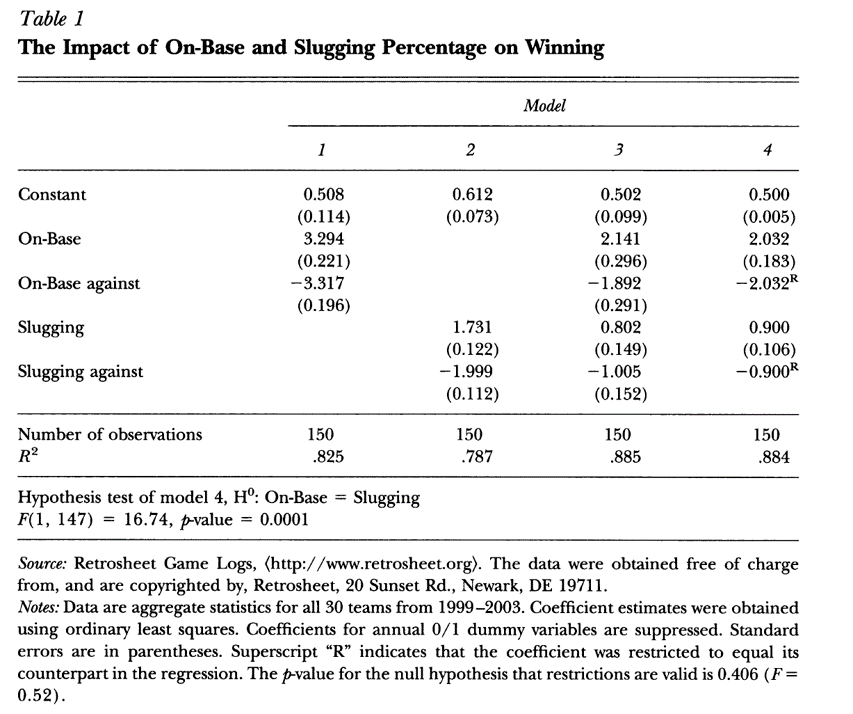

Each column represents a different regression:

>Wpc<sub>it</sub> = β<sub>0</sub> + β<sub>1</sub> OBPFOR<sub>it</sub> + β<sub>2</sub> OBPAGN<sub>it</sub>  
>Wpc<sub>it</sub> = β<sub>0</sub> + β<sub>1</sub> SLGFOR<sub>it</sub> + β<sub>2</sub> SLGAGN<sub>it</sub>  
>Wpc<sub>it</sub> = β<sub>0</sub> + β<sub>1</sub> OBPFOR<sub>it</sub> + β<sub>2</sub> OBPAGN<sub>it</sub> + β<sub>3</sub> SLGFOR<sub>it</sub> + β<sub>4</sub> SLGAGN<sub>it</sub>  
>Wpc<sub>it</sub> = β<sub>0</sub> + β<sub>1</sub>(OBPFOR<sub>it</sub> - OBPAGN<sub>it</sub>)+ β<sub>2</sub> (SLGFOR<sub>it</sub> – SLGAGN<sub>it</sub>)  

>Wpc is win percentage, OBPFOR is average OBP for the team, OBPAGN is the average OBP of opposing teams, SLGFOR is average slugging for the team, SLGAGN is the average slugging of opposing teams.  

>The subscripts “it” refer to team i in season t.  
>The β’s are the regression coefficients reported in the table.  
>β<sub>0</sub> is the constant.  

By the end of this Notebook we will have reproduced Table 1.

# The Data

H&S regress the regular season win percentage of each team on the team's average slugging (SLG) and on base percentage (OBP)  
  
**SLG is defined as (Singles + 2x Doubles + 3x Triples + 4 x Home runs) / At bats**  
   
(A single is when the batter reaches first base (1b) on a hit, a double is when the batter reach second base (2b) on a hit,   
a triple is when the batter reaches third base (3b) on a hit and a home run (hr) is when the batter is able to circle all the bases on a hit. At bats (ab) refer to the number of times a player comes to the plate, excluding cases where the batter  
was awarded a walk, was hit by pitch or hit a sacrifice fly- see OBP below.)
  
**OBP is defined as (Hits + Walks + Hit by Pitch)/(At bats + Walks + Hit by Pitch + Sacrifice Flies)**  
  
(A hit (h) here refers to a base hit, i.e. a hit which enables the batter to reach a base, a walk (usually referred to as BB  
in the statistics, which stands for "base on balls" the batter is allowed to advance to first base after four pitches called  
as balls by the umpire,  When a batter is hit by a pitch (hbp), then he is allowed to advance to first base, a sacrifice fly (sf) occurs when the batter hits the ball and is caught, but in the process a runner on base scores a run.)  
  
To calculate the average OBP and SLG *both for and against* a team, we need to obtain individual game statistics.  
For this we will use Retrosheet data.


## We begin by loading the packages we will need for this session

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Now we load the data

The excel file provided here covers the years 1999-2003.  
You can find all the individual game logs here: https://www.retrosheet.org/gamelogs/index.html  
Retrosheet data does not have headers, but these can be found here:  
https://raw.githubusercontent.com/maxtoki/baseball_R/master/data/game_log_header.csv

Note: The information used here was obtained free of charge from and is copyrighted by Retrosheet. Interested
     parties may contact Retrosheet at "www.retrosheet.org".


In [2]:
Teams = pd.read_excel("../Data/Game logs 1999-2003.xlsx")

There are 161 columns in the data, most of which we won't need. 
The following command is useful if you just want to see the variable names

In [3]:
print(Teams.columns.tolist())

['date', 'game_number', 'day', 'visitor', 'visitor_lg', 'visitor_game_number', 'home', 'home_lg', 'home_game_number', 'visitor_score', 'home_score', 'outs', 'daynight', 'completion', 'forfeit', 'protest', 'park', 'attendance', 'game_minutes', 'visitor_linescore', 'home_linescore', 'visitor_ab', 'visitor_h', 'visitor_2b', 'visitor_3b', 'visitor_hr', 'visitor_rbi', 'visitor_sh', 'visitor_sf', 'visitor_hbp', 'visitor_bb', 'visitor_ibb', 'visitor_so', 'visitor_sb', 'visitor_cs', 'visitor_gidp', 'visitor_ci', 'visitor_lob', 'visitor_pitchers_used', 'visitor_individual_er', 'visitor_team_er', 'visitor_wp', 'visitor_balks', 'visitor_putouts', 'visitor_assists', 'visitor_errors', 'visitor_passed_balls', 'visitor_double_plays', 'visitor_triple_plays', 'home_ab', 'home_h', 'home_2b', 'home_3b', 'home_hr', 'home_rbi', 'home_sh', 'home_sf', 'home_hbp', 'home_bb', 'home_ibb', 'home_so', 'home_sb', 'home_cs', 'home_gidp', 'home_ci', 'home_lob', 'home_pitchers_used', 'home_individual_er', 'home_team_

We will drop the variables we don't need for this exercise in a moment, but first we need to create some extra variables. The dataframe tells the runs scored by the home team and the visiting team  
we use this to identify if it was a hometeam win (hwin) or awayteam win (awin). 

In [4]:
Teams['hwin'] = np.where(Teams['home_score'] > Teams['visitor_score'],1,0)
Teams['awin'] = np.where(Teams['home_score'] < Teams['visitor_score'],1,0)

## Self test

Create a variable Teams["tie"] using the same type of np.where function as above. Hint: you will want to use the "=", but for logical functions you actually have to use the symbol twice, i.e. "==".

Then use "Teams.describe()" to obtain a summary of the variables.

We also want to be able to identify each season individually. There is a date variable comes in the format YYYYMMDD, but we only want YYYY. If we treat the date variable as a string, rather than as an integer, we can write a command that preserves only the first four characters. ".astype(str)" treats each entry as a string and "str[0:4]" retains the first four characters.

In [5]:
Teams['year'] = Teams['date'].astype(str).str[0:4]
display(Teams)

,date,game_number,day,visitor,visitor_lg,visitor_game_number,home,home_lg,home_game_number,visitor_score,...,home_batter_8_name,home_batter_8_pos,home_batter_9_id,home_batter_9_name,home_batter_9_pos,additional_info,acquisition,hwin,awin,year
0,19990404,0,Sun,COL,NL,1,SDN,NL,1,8,...,Chris Gomez,6,ashba002,Andy Ashby,1,NaN,Y,0,1,1999
1,19990405,0,Mon,TBA,AL,1,BAL,AL,1,7,...,Charles Johnson,2,reboj001,Jeff Reboulet,4,NaN,Y,1,0,1999
2,19990405,0,Mon,BOS,AL,1,KCA,AL,1,5,...,Rey Sanchez,6,feblc001,Carlos Febles,4,NaN,Y,0,1,1999
3,19990405,0,Mon,NYA,AL,1,OAK,AL,1,3,...,A.J. Hinch,2,tejam001,Miguel Tejada,6,NaN,Y,1,0,1999
4,19990405,0,Mon,CHA,AL,1,SEA,AL,1,8,...,Russ Davis,5,wilsd001,Dan Wilson,2,NaN,Y,0,1,1999
5,19990405,0,Mon,DET,AL,1,TEX,AL,1,11,...,Todd Zeile,5,clayr001,Royce Clayton,6,NaN,Y,0,1,1999
6,19990405,0,Mon,PHI,NL,1,ATL,NL,1,7,...,Walt Weiss,6,glavt001,Tom Glavine,1,NaN,Y,0,1,1999
7,19990405,0,Mon,SFN,NL,1,CIN,NL,1,11,...,Pokey Reese,4,tomkb001,Brett Tomko,1,NaN,Y,0,1,1999
8,19990405,0,Mon,NYN,NL,1,FLO,NL,1,2,...,Mike Redmond,2,ferna001,Alex Fernandez,1,NaN,Y,1,0,1999
9,19990405,0,Mon,ARI,NL,1,LAN,NL,1,6,...,Adrian Beltre,5,browk001,Kevin Brown,1,NaN,Y,1,0,1999


## Objective

We now want to aggregate the statistics than we need to construct SLG and OBP.  
These are ab, h, 2b, 3b, hr, sf, bb, hbp and bb.  
These statistics can be for the home team or the visiting team.  
Note that singles (reaching first base) can be defined as h - 2b - 3b -hr   

## Method  

In every game each team can appear either as the home team or the away team. So to aggregate we need to generate all of the home and away records for each team. So we will create two aggregations and then merge them to create a single set of records for each team in each season.  
  
## The aggregation for teams at home
  
The aggregation is carried out using the "groupby" function with .sum()  
reset_index() is often required after a groupby command. Try running the code without reset_index.  
We aggregated by the home team for each year, so we just rename this 'Team'



In [6]:
# We now want to aggregate the statistics that we need to construct SLG and OBP.

Teamshome = Teams.groupby(['home','year'])['visitor_ab', 'visitor_h', 'visitor_2b', 'visitor_3b', 'visitor_hr', 'visitor_sf',
                                           'visitor_hbp','visitor_bb','home_ab', 'home_h', 'home_2b', 'home_3b',
                                           'home_hr', 'home_sf', 'home_hbp', 'home_bb', 'hwin','awin'].sum()
Teamshome = Teamshome.reset_index()
Teamshome = Teamshome.rename(columns = {"home": "Team"}) 
Teamshome

,Team,year,visitor_ab,visitor_h,visitor_2b,visitor_3b,visitor_hr,visitor_sf,visitor_hbp,visitor_bb,home_ab,home_h,home_2b,home_3b,home_hr,home_sf,home_hbp,home_bb,hwin,awin
0,ANA,1999,2832,762,151,10,105,39,27,322,2666,669,118,13,74,21,23,267,37,44
1,ANA,2000,2867,800,144,8,113,24,15,320,2742,788,146,11,130,23,24,315,46,35
2,ANA,2001,2873,772,165,6,86,20,39,259,2736,731,122,12,86,29,30,251,39,42
3,ANA,2002,2799,685,132,5,70,29,22,260,2757,769,155,21,71,27,34,228,54,27
4,ANA,2003,2868,743,142,9,84,17,39,245,2685,717,135,17,68,22,27,226,45,37
5,ARI,1999,2814,693,132,22,84,16,27,256,2730,754,142,31,101,31,17,285,52,29
6,ARI,2000,2800,733,135,19,89,23,29,245,2729,763,145,25,84,33,31,271,47,34
7,ARI,2001,2804,720,122,15,121,21,29,224,2709,757,142,17,107,16,31,279,48,33
8,ARI,2002,2859,710,141,23,84,15,31,221,2709,769,151,27,83,32,26,360,55,26
9,ARI,2003,2817,710,156,15,83,18,39,262,2725,752,165,30,79,32,19,287,45,36


## Self test

.groupby is a really useful function for analyzing our data. We often need to use "reset_index" after .groupby. Try running the code again without reset_index to see why this might cause problems.

## The aggregation for visiting teams

We now repeat the process, but aggregating by year and away team (visitor), not home team.

In [7]:
Teamsaway = Teams.groupby(['year','visitor'])['visitor_ab', 'visitor_h', 'visitor_2b', 'visitor_3b', 
                                           'visitor_hr', 'visitor_sf', 'visitor_hbp', 'visitor_bb', 
                                           'home_ab', 'home_h', 'home_2b', 'home_3b', 'home_hr', 
                                           'home_sf', 'home_hbp', 'home_bb','hwin','awin'].sum()

Teamsaway = Teamsaway.reset_index()
Teamsaway = Teamsaway.rename(columns = {"visitor": "Team"}) 
Teamsaway

,year,Team,visitor_ab,visitor_h,visitor_2b,visitor_3b,visitor_hr,visitor_sf,visitor_hbp,visitor_bb,home_ab,home_h,home_2b,home_3b,home_hr,home_sf,home_hbp,home_bb,hwin,awin
0,1999,ANA,2828,735,130,9,84,21,20,244,2645,710,134,15,72,26,29,302,48,33
1,1999,ARI,2928,812,147,15,115,29,31,303,2751,694,123,12,92,14,22,287,33,48
2,1999,ATL,2901,777,151,14,111,19,31,322,2772,724,131,9,67,22,16,286,34,47
3,1999,BAL,2905,810,163,12,105,23,25,300,2638,708,157,19,97,22,19,318,44,37
4,1999,BOS,2857,758,157,22,96,27,25,292,2704,674,134,10,88,23,23,243,36,45
5,1999,CHA,2918,823,161,17,85,26,20,252,2766,782,136,14,104,26,31,315,44,37
6,1999,CHN,2775,681,115,13,91,19,22,277,2729,764,133,26,97,29,12,262,48,33
7,1999,CIN,2915,810,165,22,112,20,26,271,2626,638,138,13,74,27,22,310,30,51
8,1999,CLE,2882,810,172,16,99,34,36,373,2694,697,131,16,88,18,34,306,31,50
9,1999,COL,2779,689,131,13,79,16,20,239,2643,713,145,15,78,26,28,352,48,33


Teamshome and teamsaway summarise the record of each team as home team and as away team. We now merge teamshome and teamsaway, by team and by year.

In [8]:
Teams2 = pd.merge(Teamshome, Teamsaway, on =['Team','year'])
pd.set_option('display.max_columns', 50)
display(Teams2)

,Team,year,visitor_ab_x,visitor_h_x,visitor_2b_x,visitor_3b_x,visitor_hr_x,visitor_sf_x,visitor_hbp_x,visitor_bb_x,home_ab_x,home_h_x,home_2b_x,home_3b_x,home_hr_x,home_sf_x,home_hbp_x,home_bb_x,hwin_x,awin_x,visitor_ab_y,visitor_h_y,visitor_2b_y,visitor_3b_y,visitor_hr_y,visitor_sf_y,visitor_hbp_y,visitor_bb_y,home_ab_y,home_h_y,home_2b_y,home_3b_y,home_hr_y,home_sf_y,home_hbp_y,home_bb_y,hwin_y,awin_y
0,ANA,1999,2832,762,151,10,105,39,27,322,2666,669,118,13,74,21,23,267,37,44,2828,735,130,9,84,21,20,244,2645,710,134,15,72,26,29,302,48,33
1,ANA,2000,2867,800,144,8,113,24,15,320,2742,788,146,11,130,23,24,315,46,35,2886,786,163,23,106,20,23,293,2742,734,132,15,115,29,21,342,45,36
2,ANA,2001,2873,772,165,6,86,20,39,259,2736,731,122,12,86,29,30,251,39,42,2815,716,153,14,72,24,47,243,2656,680,120,13,82,19,25,266,45,36
3,ANA,2002,2799,685,132,5,70,29,22,260,2757,769,155,21,71,27,34,228,54,27,2921,834,178,11,81,37,40,234,2654,660,116,14,99,30,27,249,36,45
4,ANA,2003,2868,743,142,9,84,17,39,245,2685,717,135,17,68,22,27,226,45,37,2802,756,141,16,82,28,29,250,2664,701,118,18,106,25,37,241,48,32
5,ARI,1999,2814,693,132,22,84,16,27,256,2730,754,142,31,101,31,17,285,52,29,2928,812,147,15,115,29,31,303,2751,694,123,12,92,14,22,287,33,48
6,ARI,2000,2800,733,135,19,89,23,29,245,2729,763,145,25,84,33,31,271,47,34,2798,703,137,19,95,25,28,264,2699,708,126,11,101,22,13,255,43,38
7,ARI,2001,2804,720,122,15,121,21,29,224,2709,757,142,17,107,16,31,279,48,33,2886,737,142,18,101,20,26,308,2661,632,106,7,74,20,30,237,37,44
8,ARI,2002,2859,710,141,23,84,15,31,221,2709,769,151,27,83,32,26,360,55,26,2799,702,132,14,82,21,24,283,2652,651,111,9,86,21,23,200,38,43
9,ARI,2003,2817,710,156,15,83,18,39,262,2725,752,165,30,79,32,19,287,45,36,2845,715,138,17,73,20,26,244,2700,669,110,9,67,13,33,264,42,39


The data frame now contains the records for each team in each season. Note that Python creates a new name for variables if you merge files including variables with the same names. For example, both frames contain the number of hits by the home team (home_h) so Python assigns the name home_h_x to the variable from the first df in the merge (the hometeam) and home_h_y to the variable from the second df in the merge.  
All the _x variables thus relate to the team **as home team**  
All the _y variables thus relate to the team **as away team**  
     
So for example, the next line of code identifies the total number of wins for each team in each season.  
This is the sum of wins as home team and wins as away team.

In [9]:
Teams2['wins'] = Teams2['hwin_x']+Teams2['awin_y']

## The calculation of OBP and SLG  
  
Remembering that OBP =  (h + bb + hbp)/(ab + bb + hbp + sf), we have to count each statistic for team playing as home team and as away team. We call this OBPFOR.

In [10]:
Teams2['OBPFOR'] = ((Teams2['home_h_x']+Teams2['visitor_h_y']+
                    Teams2['home_bb_x']+Teams2['visitor_bb_y']+
                    Teams2['home_hbp_x']+Teams2['visitor_hbp_y'])/
                    (Teams2['home_ab_x']+Teams2['visitor_ab_y']+
                     Teams2['home_bb_x']+Teams2['visitor_bb_y']+
                     Teams2['home_hbp_x']+Teams2['visitor_hbp_y']+
                     Teams2['home_sf_x']+Teams2['visitor_sf_y']))

Now we make the same calculation for OBP of the opposing team.  
Whilst this looks complicated, we've just reversed the x's and y's from the previous line. We call this OBPAGN.

In [11]:
Teams2['OBPAGN'] = ((Teams2['home_h_y']+Teams2['visitor_h_x']+
                    Teams2['home_bb_y']+Teams2['visitor_bb_x']+
                    Teams2['home_hbp_y']+Teams2['visitor_hbp_x'])/
                    (Teams2['home_ab_y']+Teams2['visitor_ab_x']+
                     Teams2['home_bb_y']+Teams2['visitor_bb_x']+
                     Teams2['home_hbp_y']+Teams2['visitor_hbp_x']+
                     Teams2['home_sf_y']+Teams2['visitor_sf_x']))

We now repeat the process to obtain the value of SLG, remembering that  
SLG = (h - 2b - 3b - hr +2(2b) + 3(3b) + 4(hr)) /ab. We call this SLGFOR.

In [12]:
Teams2['SLGFOR'] = ((Teams2['home_h_x']+Teams2['visitor_h_y']-
                    (Teams2['home_2b_x']+Teams2['visitor_2b_y'])-
                    (Teams2['home_3b_x']+Teams2['visitor_3b_y'])-
                    (Teams2['home_hr_x']+Teams2['visitor_hr_y'])+
                    2*Teams2['home_2b_x']+2*Teams2['visitor_2b_y']+
                    3*Teams2['home_3b_x']+3*Teams2['visitor_3b_y']+
                    4*Teams2['home_hr_x']+4*Teams2['visitor_hr_y'])/
                    (Teams2['home_ab_x']+Teams2['visitor_ab_y']))

And finally we calculate SLG for the opposing team. We call this SLGAGN.

In [13]:
Teams2['SLGAGN'] = ((Teams2['home_h_y']+Teams2['visitor_h_x']-
                    (Teams2['home_2b_y']+Teams2['visitor_2b_x'])-
                    (Teams2['home_3b_y']+Teams2['visitor_3b_x'])-
                    (Teams2['home_hr_y']+Teams2['visitor_hr_x'])+
                    2*Teams2['home_2b_y']+2*Teams2['visitor_2b_x']+
                    3*Teams2['home_3b_y']+3*Teams2['visitor_3b_x']+
                    4*Teams2['home_hr_y']+4*Teams2['visitor_hr_x'])/
                    (Teams2['home_ab_y']+Teams2['visitor_ab_x']))

## Self test

Calculate team batting average (a) for and (b) against. Use .sort_values to rank the teams.

To reproduce Table 1 we only need OBPFOR, OBPAGN, SLGFOR and SLGAGN, and so we create a new df including only these variables, plus wins, names and year.

In [14]:
Teams3 = Teams2[['year', 'Team', 'wins','OBPFOR','OBPAGN','SLGFOR','SLGAGN']]
Teams3

,year,Team,wins,OBPFOR,OBPAGN,SLGFOR,SLGAGN
0,1999,ANA,70,0.321511,0.345869,0.394976,0.426876
1,2000,ANA,82,0.352355,0.350943,0.472459,0.452844
2,2001,ANA,75,0.326802,0.331493,0.404972,0.412190
3,2002,ANA,99,0.340714,0.313509,0.432547,0.392078
4,2003,ANA,77,0.330367,0.326923,0.412794,0.420824
5,1999,ARI,100,0.346553,0.319864,0.458643,0.402156
6,2000,ARI,85,0.333387,0.325830,0.429347,0.424077
7,2001,ARI,92,0.340717,0.310654,0.441823,0.404209
8,2002,ARI,98,0.346019,0.304882,0.423203,0.396843
9,2003,ARI,84,0.329622,0.321673,0.416517,0.388436


Finally, we need to calcuate win percentage. For this we also need the number of games played in the season, which is not the same for all teams. To do this we use a groupby function again on the Teams df that we created earlier,but this time instead of using ".sum()" we use ".count()". Once again we create two dfs, one for the team as home team and another for the team as away team, and then merge the two dfs.

In [15]:
TeamsGh = Teams.groupby(['year','home'])['hwin'].count()
TeamsGh = TeamsGh.reset_index()
TeamsGh = TeamsGh.rename(columns = {"home": 'Team'}) 

TeamsGa = Teams.groupby(['year','visitor'])['awin'].count()
TeamsGa = TeamsGa.reset_index()
TeamsGa = TeamsGa.rename(columns = {"visitor": 'Team'}) 

TeamsG = pd.merge(TeamsGh, TeamsGa, on =['Team','year'])
TeamsG['Games'] = TeamsG['hwin']+TeamsG['awin']
TeamsG = TeamsG[['year','Team','Games']]
TeamsG

,year,Team,Games
0,1999,ANA,162
1,1999,ARI,162
2,1999,ATL,162
3,1999,BAL,162
4,1999,BOS,162
5,1999,CHA,162
6,1999,CHN,162
7,1999,CIN,163
8,1999,CLE,162
9,1999,COL,162


We now merge this into our df with OBP and SLG data.

In [16]:
Teams3 = pd.merge(Teams3, TeamsG, on =['Team','year'])
Teams3

,year,Team,wins,OBPFOR,OBPAGN,SLGFOR,SLGAGN,Games
0,1999,ANA,70,0.321511,0.345869,0.394976,0.426876,162
1,2000,ANA,82,0.352355,0.350943,0.472459,0.452844,162
2,2001,ANA,75,0.326802,0.331493,0.404972,0.412190,162
3,2002,ANA,99,0.340714,0.313509,0.432547,0.392078,162
4,2003,ANA,77,0.330367,0.326923,0.412794,0.420824,162
5,1999,ARI,100,0.346553,0.319864,0.458643,0.402156,162
6,2000,ARI,85,0.333387,0.325830,0.429347,0.424077,162
7,2001,ARI,92,0.340717,0.310654,0.441823,0.404209,162
8,2002,ARI,98,0.346019,0.304882,0.423203,0.396843,162
9,2003,ARI,84,0.329622,0.321673,0.416517,0.388436,162


Now calculate win percentage.

In [17]:
Teams3['wpc'] = Teams3['wins']/Teams3['Games']
Teams3

,year,Team,wins,OBPFOR,OBPAGN,SLGFOR,SLGAGN,Games,wpc
0,1999,ANA,70,0.321511,0.345869,0.394976,0.426876,162,0.432099
1,2000,ANA,82,0.352355,0.350943,0.472459,0.452844,162,0.506173
2,2001,ANA,75,0.326802,0.331493,0.404972,0.412190,162,0.462963
3,2002,ANA,99,0.340714,0.313509,0.432547,0.392078,162,0.611111
4,2003,ANA,77,0.330367,0.326923,0.412794,0.420824,162,0.475309
5,1999,ARI,100,0.346553,0.319864,0.458643,0.402156,162,0.617284
6,2000,ARI,85,0.333387,0.325830,0.429347,0.424077,162,0.524691
7,2001,ARI,92,0.340717,0.310654,0.441823,0.404209,162,0.567901
8,2002,ARI,98,0.346019,0.304882,0.423203,0.396843,162,0.604938
9,2003,ARI,84,0.329622,0.321673,0.416517,0.388436,162,0.518519


## Running the regressions

We import the package for running regressions, and first run the regression from the first column of Table 1:

In [18]:
import statsmodels.formula.api as smf
WinOBP_lm = smf.ols(formula = 'wpc ~ OBPFOR + OBPAGN', data=Teams3).fit()
WinOBP_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     348.5
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           1.62e-56
Time:                        20:13:34   Log-Likelihood:                 301.40
No. Observations:                 150   AIC:                            -596.8
Df Residuals:                     147   BIC:                            -587.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5030      0.087      5.776      0.000       0.331       0.675
OBPFOR         3.3009      0.189     17.459      0.000       2.927       3.675
OBPAGN        -3.3105      0.171    -19.341      0.000      -3.649      -2.972
==============================================================================
Omnibus:                        1.861   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.394   Jarque-Bera (JB):                1.460
Skew:                          -0.013   Prob(JB):                        0.482
Kurtosis:                       2.517   Cond. No.                         85.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This regression reproduces results for the second column of Table 1:

In [19]:
WinSLG_lm = smf.ols(formula = 'wpc ~ SLGFOR + SLGAGN', data=Teams3).fit()
WinSLG_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     270.4
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           5.57e-50
Time:                        20:13:34   Log-Likelihood:                 286.04
No. Observations:                 150   AIC:                            -566.1
Df Residuals:                     147   BIC:                            -557.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5904      0.065      9.015      0.000       0.461       0.720
SLGFOR         1.7552      0.116     15.134      0.000       1.526       1.984
SLGAGN        -1.9676      0.107    -18.456      0.000      -2.178      -1.757
==============================================================================
Omnibus:                        0.471   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.790   Jarque-Bera (JB):                0.565
Skew:                          -0.127   Prob(JB):                        0.754
Kurtosis:                       2.838   Cond. No.                         50.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This regression reproduces results for the third column of Table 1:

In [20]:
WinOBPSLG_lm = smf.ols(formula = 'wpc ~ OBPFOR + OBPAGN + SLGFOR + SLGAGN', data=Teams3).fit()
WinOBPSLG_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     279.0
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           5.15e-67
Time:                        20:13:34   Log-Likelihood:                 332.53
No. Observations:                 150   AIC:                            -655.1
Df Residuals:                     145   BIC:                            -640.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5052      0.073      6.930      0.000       0.361       0.649
OBPFOR         2.1215      0.255      8.331      0.000       1.618       2.625
OBPAGN        -1.9156      0.256     -7.489      0.000      -2.421      -1.410
SLGFOR         0.8143      0.141      5.775      0.000       0.536       1.093
SLGAGN        -0.9897      0.144     -6.868      0.000      -1.275      -0.705
==============================================================================
Omnibus:                        1.334   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.513   Jarque-Bera (JB):                1.426
Skew:                          -0.196   Prob(JB):                        0.490
Kurtosis:                       2.727   Cond. No.                         165.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This regression reproduces results for the fourth column of Table 1:

In [21]:
WinOBPSLGR_lm = smf.ols(formula = 'wpc ~ I(OBPFOR - OBPAGN) + I(SLGFOR - SLGAGN)', data=Teams3).fit()
WinOBPSLGR_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     561.8
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           1.43e-69
Time:                        20:13:34   Log-Likelihood:                 332.07
No. Observations:                 150   AIC:                            -658.1
Df Residuals:                     147   BIC:                            -649.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4997      0.002    229.103      0.000       0.495       0.504
I(OBPFOR - OBPAGN)     2.0327      0.180     11.318      0.000       1.678       2.388
I(SLGFOR - SLGAGN)     0.8992      0.104      8.618      0.000       0.693       1.105
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.573
Skew:                          -0.229   Prob(JB):                        0.455
Kurtosis:                       2.796   Cond. No.                         92.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Finally, we can combine the regression results from each model in column format in a single tabel, just like H&S Table 1 

In [22]:
from statsmodels.iolib.summary2 import summary_col
Header = ['1','2','3','4']
Table_1 = summary_col([WinOBP_lm,WinSLG_lm,WinOBPSLG_lm,WinOBPSLGR_lm],\
                      regressor_order=['Intercept','OBPFOR','OBPAGN','SLGFOR','SLGAGN'],model_names = Header)
print(Table_1)


                      1        2        3        4    
------------------------------------------------------
Intercept          0.5030   0.5904   0.5052   0.4997  
                   (0.0871) (0.0655) (0.0729) (0.0022)
OBPFOR             3.3009            2.1215           
                   (0.1891)          (0.2546)         
OBPAGN             -3.3105           -1.9156          
                   (0.1712)          (0.2558)         
SLGFOR                      1.7552   0.8143           
                            (0.1160) (0.1410)         
SLGAGN                      -1.9676  -0.9897          
                            (0.1066) (0.1441)         
I(OBPFOR - OBPAGN)                            2.0327  
                                              (0.1796)
I(SLGFOR - SLGAGN)                            0.8992  
                                              (0.1043)
Standard errors in parentheses.


## Self Test

Replace OBP with batting average in regression. How does the regression model change?

# Conclusion  
  
Our Table 1 is almost exactly the same as Table 1 in H&S. The differences are statistically negligible, and may arise due to  data revisions made since Hakes and Sauer wrote their paper in 2006.   
  
The main conclusion to draw from Table 1 is that over the period 1999-2003 covered in the data, OBP was more important in determining win percentage, because the coefficient is larger than that of SLG.   

The implication of this is that, when hiring players, teams should have given significant weight to OBP. The next step is to see if this was in fact the case, by looking at the factors that determined player salaries.

